In [16]:
import numpy as np
import matplotlib.pyplot as plt; plt.ion()
import os, cv2

def read_pixels(folder, verbose = False):
    '''
    Reads 3-D pixel value of the top left corner of each image in folder
    and returns an n x 3 matrix X containing the pixel values 
    '''  
    n = len(next(os.walk(folder))[2]) # number of files
    X = np.empty([n, 3])
    i = 0

    if verbose:
        fig, ax = plt.subplots()
        h = ax.imshow(np.random.randint(255, size=(28,28,3)).astype('uint8'))

    for filename in os.listdir(folder):  
        # read image
        # img = plt.imread(os.path.join(folder,filename), 0)
        img = cv2.imread(os.path.join(folder,filename))
        # convert from BGR (opencv convention) to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # store pixel rgb value
        X[i] = img[0,0].astype(np.float64)/255
        i += 1

        # display
        if verbose:
            h.set_data(img)
            ax.set_title(filename)
            fig.canvas.flush_events()
            plt.show()

    return X

folder = 'data/training'
X1 = read_pixels(folder+'/red', verbose = False)
X2 = read_pixels(folder+'/green')
X3 = read_pixels(folder+'/blue')
y1, y2, y3 = np.full(X1.shape[0],1), np.full(X2.shape[0], 2), np.full(X3.shape[0],3)

X, y = np.concatenate((X1,X2,X3)), np.concatenate((y1,y2,y3))

print(y.shape)
print(X.shape)

(3694,)
(3694, 3)


# Training the model

In [17]:
from pixel_classifier import PixelClassifier
multilogistic = PixelClassifier()
weigths = multilogistic.train(X, y, epochs=150, lr=0.0001, verbose=False)
print(multilogistic.accuracy(X, y))

0.9994585814834868


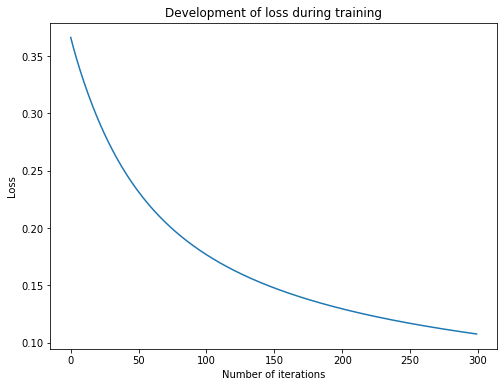

In [18]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(multilogistic.get_loss())), multilogistic.get_loss())
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

# Testing precision for red pixels

In [23]:
folder = 'data/validation/red'
  
X = read_pixels(folder)
y = multilogistic.classify(X)

In [24]:
# Multiple print statements added for debugging
y = np.array(y)
print('Precision: %f' % (sum(y==1)/y.shape[0]))
# print('Precision: %f' % (sum(y==2)/y.shape[0]))
# print('Precision: %f' % (sum(y==3)/y.shape[0]))

Precision: 1.000000
Precision: 0.000000
Precision: 0.000000
